In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import hamming_loss, zero_one_loss, f1_score
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset


from sklearn.neighbors import KNeighborsClassifier as kNN

import time

import matplotlib 
import matplotlib.pyplot as plt

In [2]:
emotions = pd.read_csv("D:/2021FALL/EC503/Project/coding part/emotions/csv_result-emotions.csv")
emotions = emotions.iloc[:, 1:]
emotions

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2,0.261742,0.002657,1.149211,0,0,1,1,1,0
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2,0.282122,0.052218,0.335371,1,0,0,0,1,1
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2,0.184313,0.247136,0.476993,0,0,1,1,1,0
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2,0.547126,0.183494,1.255820,0,1,1,0,0,0


In [3]:
X = emotions.iloc[:, 0:-6]
y = emotions.iloc[:, -6:]
print(X.shape)
print(y.shape)

(593, 72)
(593, 6)


In [4]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=0, train_size = 0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [5]:
# Custom accuracy score based on hamming loss implementation

def get_accuracy_score(y_test,y_pred):
    
    if 'numpy' not in str(type(y_pred)):
        y_pred = y_pred.to_numpy()
        
    if 'numpy' not in str(type(y_test)):
        y_test = y_test.to_numpy()
    
    
    assert(y_test.shape == y_pred.shape)
    
    if y_pred.shape[1] <= 5: #For a smaller number of labels, a ratio of half the labels being correct is good enough
        ratio = 0.5
    else:
        ratio = 0.7 #For a number of labels, at least 70% of the predicted labels must be correct
    
    acc_rows = []
    
    for i in range(len(y_test)):
        acc_rows.append(np.count_nonzero(y_test[i]==y_pred[i]))
#         acc_rows.append(np.count_nonzero(y_test.iloc[i,:].values==y_pred.iloc[i,:].values)) #Count the number of matches
        
    acc_rows = [1 if x/y_pred.shape[1] >= ratio else 0 for x in acc_rows] #1 if ratio of match in a row is greater than ratio, else 0
    return sum(acc_rows)/len(acc_rows) # Mean accuracy

In [6]:
k_range = list(range(31))

In [7]:
test_hamming_loss= []
for k_num in k_range[1:]:
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
#     display(hamming_loss(y_test, y_pred))
    test_hamming_loss.append(hamming_loss(y_valid, y_valid_res))

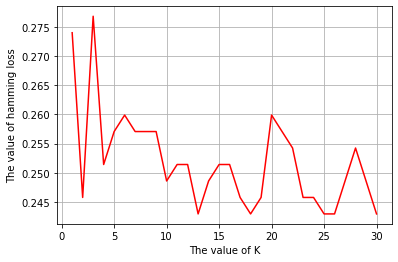

In [8]:
plt.plot(k_range[1:], test_hamming_loss, 'r', label = 'BR imported')
plt.xlabel('The value of K')
plt.ylabel('The value of hamming loss')
plt.grid(True)
plt.show()

In [9]:
min_hl = min(test_hamming_loss)
test_hamming_loss.index(min_hl)
print(test_hamming_loss[18])

0.2457627118644068


In [10]:
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 18),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
test_hl = hamming_loss(y_test, y_pred)
test_hl

0.2388888888888889

In [11]:
acc_score = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
    y_valid_res = pd.DataFrame.sparse.from_spmatrix(y_valid_res)
#     display(hamming_loss(y_test, y_pred))
    acc_score.append(get_accuracy_score(y_valid, y_valid_res))

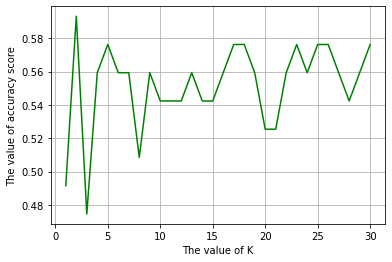

In [12]:
plt.plot(k_range[1:], acc_score, 'g', label = 'BR imported')
plt.xlabel('The value of K')
plt.ylabel('The value of accuracy score')
plt.grid(True)
# plt.savefig('D:/2021FALL/EC503/Project/coding part/BRhamming_loss_emotion.png')
plt.show()

In [15]:
max_acc = max(acc_score)
print(acc_score.index(max_acc))
print(acc_score[15])

1
0.559322033898305


In [16]:
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 2),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame.sparse.from_spmatrix(y_pred)
#     display(hamming_loss(y_test, y_pred))
test_acc = get_accuracy_score(y_test, y_pred)
test_acc

0.5333333333333333

In [11]:
start_time = time.time()
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 13),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06802082061767578 seconds ---


In [ ]:
#LP

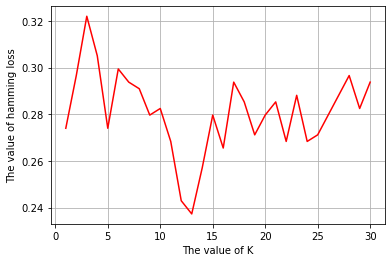

In [17]:
LPtest_hamming_loss= []
for k_num in k_range[1:]:
    classifier = LabelPowerset(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
#     display(hamming_loss(y_test, y_pred))
    LPtest_hamming_loss.append(hamming_loss(y_valid, y_valid_res))
    
    
plt.plot(k_range[1:], LPtest_hamming_loss, 'r', label = 'LP imported')
plt.xlabel('The value of K')
plt.ylabel('The value of hamming loss')
plt.grid(True)
# plt.savefig('D:/2021FALL/EC503/Project/coding part/LPhamming_loss_emotion.png')
plt.show()

In [19]:
lp_min = min(LPtest_hamming_loss)
print(LPtest_hamming_loss.index(lp_min))
print(LPtest_hamming_loss[13])

12
0.2570621468926554


In [20]:
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 13),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
LPtest_hl = hamming_loss(y_test, y_pred)
LPtest_hl

0.24722222222222223

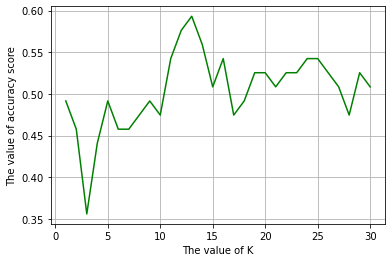

In [21]:
LPacc_score = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = LabelPowerset(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_valid_res = classifier.predict(X_valid)
    y_valid_res = pd.DataFrame.sparse.from_spmatrix(y_valid_res)
#     display(hamming_loss(y_test, y_pred))
    LPacc_score.append(get_accuracy_score(y_valid, y_valid_res))
    
plt.plot(k_range[1:], LPacc_score, 'g', label = 'LP imported')
plt.xlabel('The value of K')
plt.ylabel('The value of accuracy score')
plt.grid(True)
# plt.savefig('D:/2021FALL/EC503/Project/coding part/LPaccuracy_emotion.png')
plt.show()

In [24]:
lp_max = max(LPacc_score)
print(LPacc_score.index(lp_max))
print(LPacc_score[13])

12
0.559322033898305


In [25]:
classifier = BinaryRelevance(
    classifier = kNN(n_neighbors = 13),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame.sparse.from_spmatrix(y_pred)

LPtest_acc = get_accuracy_score(y_test, y_pred)
LPtest_acc

0.5333333333333333

In [6]:
start_time = time.time()
classifier = LabelPowerset(
    classifier = kNN(n_neighbors = 13),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.02288222312927246 seconds ---


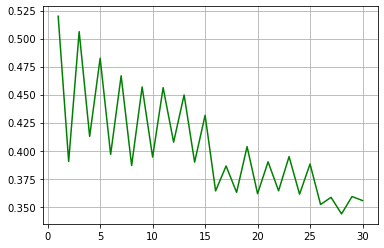

In [12]:
test_f1 = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
    test_f1.append(f1_score(y_test, y_pred, average = 'macro'))
    
    
plt.plot(k_range[1:], test_f1, 'g', label = 'BR imported')
plt.grid(True)
plt.show()

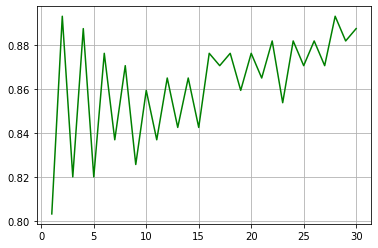

In [23]:
test_zeroone_loss_1 = []
for k_num in k_range[1:]:
    # initialize LabelPowerset multi-label classifier with a RandomForest
    classifier = BinaryRelevance(
        classifier = kNN(n_neighbors = k_num),
        require_dense = [False, True]
    )

    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)
#     display(hamming_loss(y_test, y_pred))
    test_zeroone_loss_1.append(zero_one_loss(y_test, y_pred))
    

plt.plot(k_range[1:], test_zeroone_loss_1, 'g', label = 'BR imported')
plt.grid(True)
plt.show()